In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 1. 데이터 준비 및 탐색

In [2]:
df = pd.read_csv("./cruise_ship_info.csv")
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [3]:
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

- 피처
    - ship_name : 선박 이름
    - Cruise_line : 크루즈 라인
    - Age : 2013년 기준 연령
    - Tonnage : 선박의 용량을 나타내는 단위(1000s of tons)
    - passengers : 승객 (100s)
    - length : 길이 (100s of feet)
    - cabins : 선실 (100s)
    - passenger_desity : 승객 밀도 
    - crew : 승무원 (100s)

In [4]:
df.shape

(158, 9)

In [5]:
df.dtypes

Ship_name             object
Cruise_line           object
Age                    int64
Tonnage              float64
passengers           float64
length               float64
cabins               float64
passenger_density    float64
crew                 float64
dtype: object

In [6]:
df.isna().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

In [7]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


# 2. 시각화

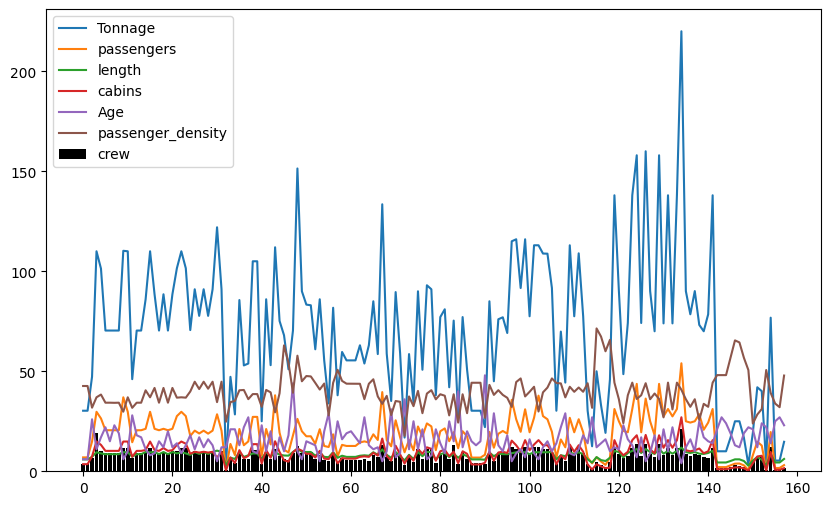

In [8]:
x_pos = np.arange(len(df["crew"]))

plt.figure(figsize=(10, 6))
plt.plot(df["Tonnage"])
plt.plot(df["passengers"])
plt.plot(df["length"])
plt.plot(df["cabins"])
plt.plot(df["Age"])
plt.plot(df["passenger_density"])

plt.bar(x_pos,df["crew"], color = "black")

plt.legend(["Tonnage", "passengers", "length", "cabins", "Age", "passenger_density",  "crew"])

plt.show()

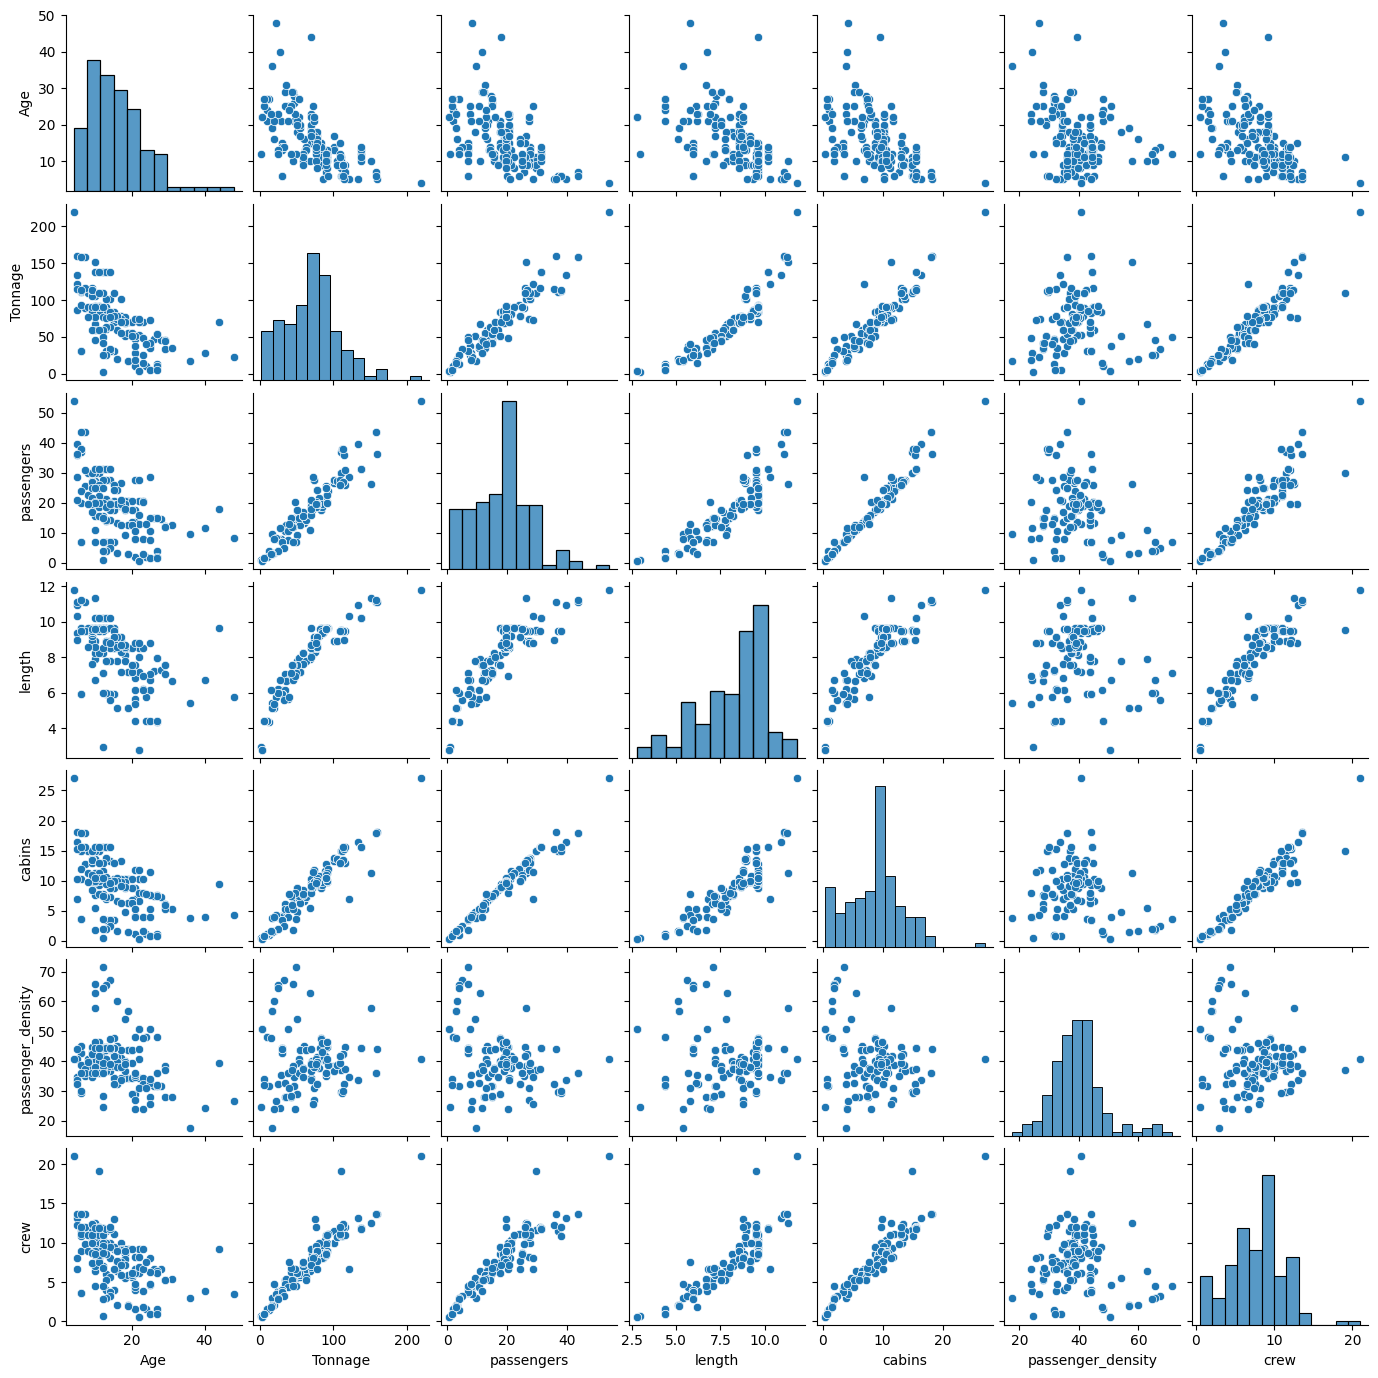

In [9]:
df_label = ["Age", "Tonnage", "passengers", "length", "cabins", "passenger_density", "crew"]

sns.pairplot(df[df_label], height=2.0)

In [10]:
df_heat = df.columns[2:]
df_heat

Index(['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density',
       'crew'],
      dtype='object')

In [11]:
df_heat = df[df_heat].corr()
df_heat

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830,-0.530657
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846,0.927569
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867,0.915234
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488,0.895857
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181,0.950823
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000,-0.155509
crew,-0.530657,0.927569,0.915234,0.895857,0.950823,-0.155509,1.000000


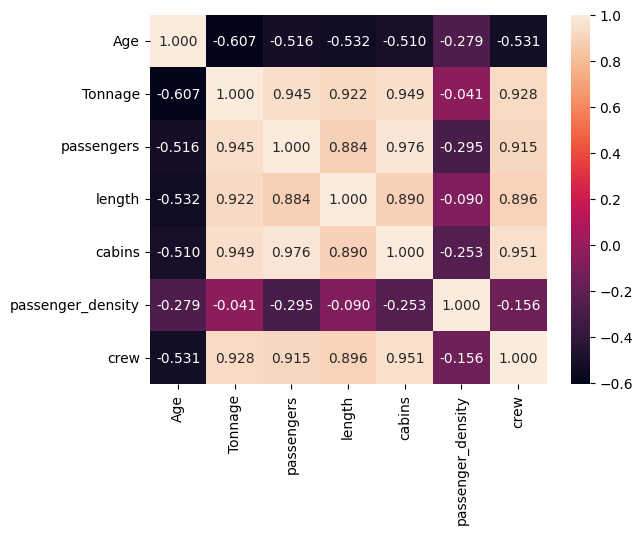

In [12]:
sns.heatmap(df_heat.values, cbar = True, annot= True, fmt = ".3f",
            yticklabels= df_heat, xticklabels= df_heat)
plt.show()

- "Crew" 피처와 관련해...
    - "Cabins" 피처와 가장 큰 관련성 가짐 ("cabins" > "Tonnage" > "passengers" > "length")
    - "Age", "passenger_density" 피처와는 음수성을 나타내며 연관성이 없으므로 해당 피처 제거
    - 또한 승무원 수를 구하는데에 "Ship_name"과 "Cruise_line"은 관련성이 없기 때문에 해당 피처 제거

    =>따라서 "Crew"수를 예측하는데 필요한 데이터 : <strong>"cabins", "Tonnage", "passengers", "length", "crew" </strong>
    

In [13]:
ship_crew = df[[ "cabins", "Tonnage", "passengers", "length", "crew"]]
ship_crew.head()

,cabins,Tonnage,passengers,length,crew
0,3.55,30.277,6.94,5.94,3.55
1,3.55,30.277,6.94,5.94,3.55
2,7.43,47.262,14.86,7.22,6.70
3,14.88,110.000,29.74,9.53,19.10
4,13.21,101.353,26.42,8.92,10.00


# 3. 스케일링

In [14]:
target = ["Age", "Tonnage", "passengers", "length", "cabins", "passenger_density", "crew"]

scaler = MinMaxScaler()
df2 = df.copy()
df2[target] = scaler.fit_transform(df2[target])
df2.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,0.045455,0.128396,0.117735,0.348837,0.120735,0.464173,0.145027
1,Quest,Azamara,0.045455,0.128396,0.117735,0.348837,0.120735,0.464173,0.145027
2,Celebration,Carnival,0.500000,0.206426,0.266217,0.490587,0.266217,0.262423,0.299363
3,Conquest,Carnival,0.159091,0.494650,0.545182,0.746401,0.545557,0.359017,0.906908
4,Destiny,Carnival,0.295455,0.454925,0.482940,0.678848,0.482940,0.384515,0.461049


In [15]:
ship_crew = df2[["cabins", "Tonnage", "passengers", "length", "crew"]]
ship_crew

,cabins,Tonnage,passengers,length,crew
0,0.120735,0.128396,0.117735,0.348837,0.145027
1,0.120735,0.128396,0.117735,0.348837,0.145027
2,0.266217,0.206426,0.266217,0.490587,0.299363
3,0.545557,0.494650,0.545182,0.746401,0.906908
4,0.482940,0.454925,0.482940,0.678848,0.461049
...,...,...,...,...,...
153,0.000000,0.004649,0.000000,0.000000,0.000000
154,0.350206,0.342126,0.355081,0.664452,0.559040
155,0.015373,0.013879,0.017248,0.178295,0.014209
156,0.015373,0.013879,0.018935,0.178295,0.014209


# 4. 선형회귀 사용

In [16]:
x = ship_crew.drop("crew", axis=1)
y = ship_crew["crew"] 

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=22)

In [18]:
x_train.shape, x_test.shape

((118, 4), (40, 4))

In [19]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [20]:
# 모델 평가
lr.score(x_test, y_test)

0.9535426891482373

In [21]:
pred = lr.predict(x_test)

In [22]:
# mean_squared_error 평가
mse = mean_squared_error(y_test, pred)
mse

0.0016279606154622525

In [23]:
pred_df = pd.DataFrame({"ans" : y_test, "pred" : pred})
pred_df

,ans,pred
115,0.189123,0.195864
77,0.514454,0.487966
35,0.421852,0.442934
46,0.238119,0.238776
112,0.412053,0.400878
141,0.547281,0.636657
94,0.412053,0.394158
31,0.460559,0.422278
66,0.314062,0.327069
30,0.299363,0.263932
